In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

In [8]:
url_prefix = 'https://t.me/'
sources = [
    'kommersant',
    'rian_ru',
    'tass_agency',
    'd_code',
    'ENews112',
    'aviadispet4er',
    'headlines_for_traders',
    'mosrutop',
    'rbc_news',
]

In [9]:
parsing_dir = './2025-10-22_11-51-33'
data_path = f'{parsing_dir}/{sources[0]}.csv'

In [10]:
df = pd.read_csv(data_path)

In [11]:
df.head()

,text,date,channel
0,**Венгрия не будет арестовывать Владимира Пути...,2025-10-22 08:43:20+00:00,https://t.me/kommersant
1,"**«Автоваз» добровольно отзывает 8,2 тыс. Lada...",2025-10-22 08:36:55+00:00,https://t.me/kommersant
2,**Неизвестные ограбили «Дом просвещения Дени Д...,2025-10-22 08:31:27+00:00,https://t.me/kommersant
3,«Уход глобальных игроков создал окно возможнос...,2025-10-22 08:06:06+00:00,https://t.me/kommersant
4,"Газета The Telegraph [сообщает,](https://www.k...",2025-10-22 07:59:32+00:00,https://t.me/kommersant


In [12]:
import os

all_dfs = []

# Loop through all sources and read each CSV file
for source in sources:
    data_path = f'{parsing_dir}/{source}.csv'
    
    # Check if file exists before reading
    if os.path.exists(data_path):
        df_temp = pd.read_csv(data_path)
        
        # Add channel short name column
        df_temp['channel_short'] = source
        
        # Append to the list
        all_dfs.append(df_temp)
        print(f"✓ Loaded {source} with {len(df_temp)} rows")
    else:
        print(f"✗ File not found: {data_path}")

# Combine all DataFrames into one
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    
    # Display the combined DataFrame info and first few rows
    print(f"\nCombined DataFrame shape: {combined_df.shape}")
    print(f"Total rows: {len(combined_df)}")
    print(f"Channels included: {combined_df['channel_short'].unique().tolist()}")
    
    print("\nFirst few rows of combined DataFrame:")
    print(combined_df.head())
    
    # Optional: Save the combined DataFrame to a new CSV file
    combined_df.to_csv(f'{parsing_dir}/all_channels_combined.csv', index=False)
    print(f"\n✓ Combined data saved to: {parsing_dir}/all_channels_combined.csv")
else:
    print("No data was loaded. Please check if the CSV files exist.")

✓ Loaded kommersant with 50 rows
✓ Loaded rian_ru with 42 rows
✓ Loaded tass_agency with 46 rows
✓ Loaded d_code with 46 rows
✓ Loaded ENews112 with 28 rows
✓ Loaded aviadispet4er with 35 rows
✓ Loaded headlines_for_traders with 48 rows
✓ Loaded mosrutop with 21 rows
✓ Loaded rbc_news with 49 rows

Combined DataFrame shape: (365, 4)
Total rows: 365
Channels included: ['kommersant', 'rian_ru', 'tass_agency', 'd_code', 'ENews112', 'aviadispet4er', 'headlines_for_traders', 'mosrutop', 'rbc_news']

First few rows of combined DataFrame:
                                                text  \
0  **Венгрия не будет арестовывать Владимира Пути...   
1  **«Автоваз» добровольно отзывает 8,2 тыс. Lada...   
2  **Неизвестные ограбили «Дом просвещения Дени Д...   
3  «Уход глобальных игроков создал окно возможнос...   
4  Газета The Telegraph [сообщает,](https://www.k...   

                        date                  channel channel_short  
0  2025-10-22 08:43:20+00:00  https://t.me/kommersant  

In [13]:
df = combined_df

In [14]:
df = df.sample(frac=1).reset_index(drop=True)


In [15]:
df.head(7)

,text,date,channel,channel_short
0,⚠️ **U.K. CPI (YoY)**:\n\n ▫ **+3.8%** (ожид....,2025-10-22 06:01:32+00:00,https://t.me/headlines_for_traders,headlines_for_traders
1,Великобритания [исключила](https://www.kommers...,2025-10-21 22:03:51+00:00,https://t.me/kommersant,kommersant
2,"Украинские войска минируют здания, роют окопы ...",2025-10-22 06:15:01+00:00,https://t.me/rian_ru,rian_ru
3,Два человека пострадали в результате удара укр...,2025-10-21 17:07:50+00:00,https://t.me/rbc_news,rbc_news
4,Спасенный дважды: женщина спасла котенка на ож...,2025-10-19 07:48:54+00:00,https://t.me/ENews112,ENews112
5,"Пожилой москвич, запуганный аферистами, отдал ...",2025-10-22 08:33:38+00:00,https://t.me/rian_ru,rian_ru
6,"В Киеве полагают, что политика американского п...",2025-10-21 19:03:38+00:00,https://t.me/rbc_news,rbc_news


In [16]:
for string in df["text"].head(7):
    print(string)

⚠️ **U.K. CPI (YoY)**:

  ▫ **+3.8%** (ожид. **+4.0%**)
  ▫ пред. значение: **+3.8%**

**U.K. CPI Core (YoY)**:

  ▫ **+3.5%** (ожид. **+3.7%**)
  ▫ пред. значение: **+3.6%**
Великобритания [исключила](https://www.kommersant.ru/doc/8140084?tg) группировку «Хайат Тахрир аш-Шам» (ХТШ, запрещена в России) из списка террористических организаций.

Как говорится в заявлении британских МИД и МВД, это решение направлено на развитие сотрудничества с новым руководством Сирии и поддержку приоритетных задач Великобритании, включая борьбу с терроризмом, контроль миграции и ликвидацию химического оружия.

▪ [Подписывайтесь на «Ъ»|](https://t.me/+bPtk49gFbCBkYzdi)[Оставляйте «бусты»](https://t.me/kommersant?boost)
Украинские войска минируют здания, роют окопы и строят укрепленные точки в подконтрольном им Херсоне, сообщил РИА Новости Сальдо. 

Насмотревшись ранее на их тактику, понимаешь, что в самом критическом для них случае они попытаются устроить в Херсоне то же, что ранее в Артемовске - будут ис

In [17]:
import re
import pandas as pd

def clean_telegram_text(text, remove_links=True, remove_formatting=True, remove_emoji=True, remove_mentions=True, remove_hashtags=False):
    """
    Очищает текст Telegram сообщения от Markdown разметки и других элементов
    
    Параметры:
    text (str): исходный текст
    remove_links (bool): удалять ли ссылки
    remove_formatting (bool): удалять ли Markdown форматирование (жирный, курсив и т.д.)
    remove_emoji (bool): удалять ли эмодзи
    remove_mentions (bool): удалять ли упоминания (@username)
    remove_hashtags (bool): удалять ли хэштеги
    
    Возвращает:
    str: очищенный текст
    """
    if not isinstance(text, str):
        return text
    
    cleaned_text = text
    
    # Удаление ссылок [текст](URL) -> текст
    if remove_links:
        cleaned_text = re.sub(r'\[([^\]]+)\]\([^)]+\)', r'\1', cleaned_text)
    
    # Удаление Markdown форматирования
    if remove_formatting:
        # Жирный текст **текст** -> текст
        cleaned_text = re.sub(r'\*\*([^*]+)\*\*', r'\1', cleaned_text)
        # Курсив *текст* -> текст
        cleaned_text = re.sub(r'\*([^*]+)\*', r'\1', cleaned_text)
        # Курсив _текст_ -> текст
        cleaned_text = re.sub(r'_([^_]+)_', r'\1', cleaned_text)
        # Подчеркивание __текст__ -> текст
        cleaned_text = re.sub(r'__([^_]+)__', r'\1', cleaned_text)
        # Зачеркивание ~~текст~~ -> текст
        cleaned_text = re.sub(r'~~([^~]+)~~', r'\1', cleaned_text)
        # Код `код` -> код
        cleaned_text = re.sub(r'`([^`]+)`', r'\1', cleaned_text)
    
    # Удаление эмодзи и специальных символов
    if remove_emoji:
        # Паттерн для эмодзи и специальных символов
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # эмоции
            u"\U0001F300-\U0001F5FF"  # символы и пиктограммы
            u"\U0001F680-\U0001F6FF"  # транспорт и карты
            u"\U0001F1E0-\U0001F1FF"  # флаги
            u"\U00002500-\U00002BEF"  # различные символы
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # вариационные селекторы
            u"\u3030"
            "]+", flags=re.UNICODE)
        cleaned_text = emoji_pattern.sub(r'', cleaned_text)
    
    # Удаление упоминаний
    if remove_mentions:
        cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    
    # Удаление хэштегов
    if remove_hashtags:
        cleaned_text = re.sub(r'#\w+', '', cleaned_text)
    
    # Удаление лишних пробелов и переносов строк
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

# Применение функции к DataFrame
def apply_text_cleaning(df, text_column='text', **kwargs):
    """
    Применяет очистку текста к указанному столбцу DataFrame
    
    Параметры:
    df (pd.DataFrame): исходный DataFrame
    text_column (str): название столбца с текстом
    **kwargs: параметры для функции clean_telegram_text
    
    Возвращает:
    pd.DataFrame: DataFrame с очищенным текстом
    """
    df_cleaned = df.copy()
    df_cleaned[f'{text_column}_cleaned'] = df_cleaned[text_column].apply(
        lambda x: clean_telegram_text(x, **kwargs)
    )
    return df_cleaned

In [18]:
df = apply_text_cleaning(df)

In [19]:
df.head()

,text,date,channel,channel_short,text_cleaned
0,⚠️ **U.K. CPI (YoY)**:\n\n ▫ **+3.8%** (ожид....,2025-10-22 06:01:32+00:00,https://t.me/headlines_for_traders,headlines_for_traders,U.K. CPI (YoY): +3.8% (ожид. +4.0%) пред. знач...
1,Великобритания [исключила](https://www.kommers...,2025-10-21 22:03:51+00:00,https://t.me/kommersant,kommersant,Великобритания исключила группировку «Хайат Та...
2,"Украинские войска минируют здания, роют окопы ...",2025-10-22 06:15:01+00:00,https://t.me/rian_ru,rian_ru,"Украинские войска минируют здания, роют окопы ..."
3,Два человека пострадали в результате удара укр...,2025-10-21 17:07:50+00:00,https://t.me/rbc_news,rbc_news,Два человека пострадали в результате удара укр...
4,Спасенный дважды: женщина спасла котенка на ож...,2025-10-19 07:48:54+00:00,https://t.me/ENews112,ENews112,Спасенный дважды: женщина спасла котенка на ож...


In [20]:
for string in df["text_cleaned"].head(7):
    print(string)

U.K. CPI (YoY): +3.8% (ожид. +4.0%) пред. значение: +3.8% U.K. CPI Core (YoY): +3.5% (ожид. +3.7%) пред. значение: +3.6%
Великобритания исключила группировку «Хайат Тахрир аш-Шам» (ХТШ, запрещена в России) из списка террористических организаций. Как говорится в заявлении британских МИД и МВД, это решение направлено на развитие сотрудничества с новым руководством Сирии и поддержку приоритетных задач Великобритании, включая борьбу с терроризмом, контроль миграции и ликвидацию химического оружия. Подписывайтесь на «Ъ»|Оставляйте «бусты»
Украинские войска минируют здания, роют окопы и строят укрепленные точки в подконтрольном им Херсоне, сообщил РИА Новости Сальдо. Насмотревшись ранее на их тактику, понимаешь, что в самом критическом для них случае они попытаются устроить в Херсоне то же, что ранее в Артемовске - будут использовать жилую застройку как готовые укрепления, прикрываясь мирным населением Подписаться на РИА Новости
Два человека пострадали в результате удара украинского дрона по

## 1. Подготовка

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    Doc,
    NamesExtractor
)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Инициализация компонентов Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

# Для русского языка
try:
    nltk.download('punkt')
    nltk.download('stopwords')
except:
    pass

russian_stopwords = set(stopwords.words('russian'))
print(russian_stopwords)


c:\Users\User\Desktop\Project EDA\.venv\Lib\site-packages\pymorphy2\analyzer.py:114: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


{'что', 'нас', 'же', 'там', 'всегда', 'ты', 'мой', 'вас', 'них', 'во', 'себя', 'этого', 'ж', 'потому', 'теперь', 'никогда', 'мне', 'свою', 'этот', 'хоть', 'были', 'более', 'перед', 'того', 'всю', 'нет', 'да', 'зачем', 'ведь', 'на', 'бы', 'тем', 'три', 'его', 'не', 'нельзя', 'тебя', 'для', 'конечно', 'тут', 'мы', 'наконец', 'до', 'кто', 'была', 'только', 'этом', 'нибудь', 'всех', 'можно', 'было', 'за', 'из', 'ну', 'себе', 'даже', 'надо', 'нее', 'другой', 'может', 'от', 'без', 'об', 'вам', 'им', 'как', 'еще', 'у', 'впрочем', 'тогда', 'он', 'него', 'через', 'вот', 'ним', 'то', 'сам', 'если', 'почти', 'тоже', 'эти', 'здесь', 'чего', 'совсем', 'много', 'и', 'над', 'она', 'вы', 'чтоб', 'какая', 'потом', 'ни', 'быть', 'один', 'ее', 'под', 'ли', 'больше', 'лучше', 'будто', 'про', 'по', 'вдруг', 'уж', 'в', 'будет', 'хорошо', 'с', 'чтобы', 'между', 'я', 'меня', 'какой', 'эту', 'чуть', 'где', 'когда', 'уже', 'при', 'был', 'том', 'ничего', 'моя', 'все', 'к', 'они', 'чем', 'опять', 'такой', 'а', 'е

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Инициализация компонентов Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

# Простая функция для токенизации предложений на русском
def russian_sent_tokenize(text):
    """Простая токенизация предложений для русского языка"""
    # Разделяем по точкам, восклицательным и вопросительным знакам
    sentences = re.split(r'[.!?]+', text)
    # Убираем пустые строки и обрезаем пробелы
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

## 2. Базовая статистика

In [25]:
def basic_text_statistics(df, text_column='text_cleaned'):
    """Расширенная статистика текста"""
    stats = {}
    
    df = df.dropna(subset=[text_column])
    texts = df[text_column].astype(str)
    
    stats['total_documents'] = len(texts)
    stats['total_characters'] = texts.str.len().sum()
    stats['total_words'] = texts.str.split().str.len().sum()
    
    # Используем нашу функцию для токенизации предложений
    stats['total_sentences'] = texts.apply(lambda x: len(russian_sent_tokenize(x))).sum()
    
    char_lengths = texts.str.len()
    word_counts = texts.str.split().str.len()
    sentence_counts = texts.apply(lambda x: len(russian_sent_tokenize(x)))
    
    stats.update({
        'avg_chars_per_doc': char_lengths.mean(),
        'avg_words_per_doc': word_counts.mean(),
        'avg_sentences_per_doc': sentence_counts.mean(),
        'avg_words_per_sentence': stats['total_words'] / stats['total_sentences'] if stats['total_sentences'] > 0 else 0,
        'max_chars': char_lengths.max(),
        'max_words': word_counts.max(),
        'min_chars': char_lengths.min(),
        'min_words': word_counts.min()
    })
    
    return stats, char_lengths, word_counts, sentence_counts

# Применяем функцию
stats, char_lengths, word_counts, sentence_counts = basic_text_statistics(df)

print("📊 БАЗОВАЯ СТАТИСТИКА ТЕКСТА:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

📊 БАЗОВАЯ СТАТИСТИКА ТЕКСТА:
total_documents: 365
total_characters: 159468
total_words: 21506
total_sentences: 1760
avg_chars_per_doc: 436.90
avg_words_per_doc: 58.92
avg_sentences_per_doc: 4.82
avg_words_per_sentence: 12.22
max_chars: 3189
max_words: 408
min_chars: 8
min_words: 1


## 3. Визуализация распределения длин

In [26]:
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.


In [27]:
def create_length_visualizations(char_lengths, word_counts, sentence_counts):
    """Создание визуализаций для длин текстов"""
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Распределение длины в символах', 
                       'Распределение количества слов',
                       'Распределение количества предложений',
                       'Соотношение длины текстов'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"type": "pie"}]]
    )

    # Гистограмма длины в символах
    fig.add_trace(go.Histogram(x=char_lengths, name='Символы', nbinsx=50),
                  row=1, col=1)

    # Гистограмма количества слов
    fig.add_trace(go.Histogram(x=word_counts, name='Слова', nbinsx=50),
                  row=1, col=2)

    # Гистограмма количества предложений
    fig.add_trace(go.Histogram(x=sentence_counts, name='Предложения', nbinsx=50),
                  row=2, col=1)

    # Круговая диаграмма по категориям длины
    length_categories = pd.cut(word_counts, 
                              bins=[0, 50, 200, 500, 1000, np.inf],
                              labels=['Очень короткие (<50)', 'Короткие (50-200)', 
                                     'Средние (200-500)', 'Длинные (500-1000)', 
                                     'Очень длинные (>1000)'])
    category_counts = length_categories.value_counts()
    fig.add_trace(go.Pie(labels=category_counts.index, 
                         values=category_counts.values,
                         name="Категории длины"),
                  row=2, col=2)

    fig.update_layout(height=800, title_text="Анализ длины текстов")
    fig.show()

create_length_visualizations(char_lengths, word_counts, sentence_counts)

## 4. Анализ токенов и лексического разнообразия


In [28]:
def analyze_tokens(texts):
    """Анализ токенов и лексического разнообразия"""
    all_tokens = []
    all_words = []
    
    # Простые русские стоп-слова
    russian_stopwords = {
        'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то',
        'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за',
        'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет',
        'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если',
        'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять',
        'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они',
        'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была',
        'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет',
        'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем',
        'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас',
        'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два',
        'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас',
        'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем',
        'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя',
        'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'
    }
    
    for text in texts:
        # Простая токенизация по пробелам и пунктуации
        tokens = re.findall(r'\b\w+\b', text.lower())
        # Фильтрация: только буквы, длина > 2, не стоп-слова
        words = [token for token in tokens 
                if token.isalpha() and len(token) > 2 and token not in russian_stopwords]
        
        all_tokens.extend(tokens)
        all_words.extend(words)
    
    # Частотный анализ
    word_freq = Counter(all_words)
    token_freq = Counter(all_tokens)
    
    # Лексическое разнообразие
    vocab_size = len(set(all_words))
    total_words = len(all_words)
    lexical_diversity = vocab_size / total_words if total_words > 0 else 0
    
    return {
        'total_tokens': len(all_tokens),
        'total_words': total_words,
        'vocab_size': vocab_size,
        'lexical_diversity': lexical_diversity,
        'word_freq': word_freq,
        'token_freq': token_freq,
        'top_words': word_freq.most_common(50)
    }

# Применяем анализ
texts_sample = df['text_cleaned'].dropna().astype(str)
token_stats = analyze_tokens(texts_sample)

print("📈 ЛЕКСИЧЕСКОЕ РАЗНООБРАЗИЕ:")
print(f"Общее количество токенов: {token_stats['total_tokens']}")
print(f"Общее количество слов (после очистки): {token_stats['total_words']}")
print(f"Размер словаря: {token_stats['vocab_size']}")
print(f"Лексическое разнообразие: {token_stats['lexical_diversity']:.4f}")

📈 ЛЕКСИЧЕСКОЕ РАЗНООБРАЗИЕ:
Общее количество токенов: 22069
Общее количество слов (после очистки): 15465
Размер словаря: 8131
Лексическое разнообразие: 0.5258


## 5. Визуализация частот слов


In [29]:
%pip install nbformat==5.10.3



Note: you may need to restart the kernel to use updated packages.


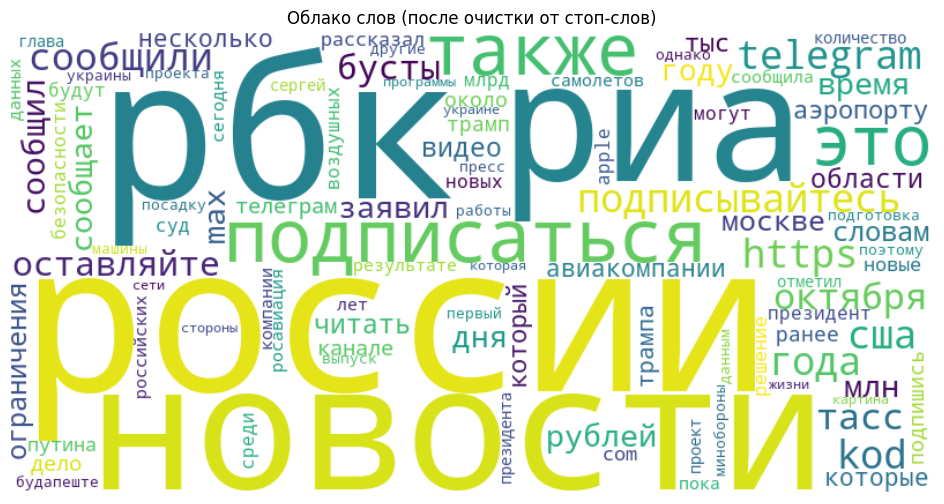

In [30]:
def create_word_visualizations(token_stats):
    """Создание визуализаций для слов"""
    
    # Топ-30 самых частых слов
    top_words = token_stats['top_words'][:30]

    fig = px.bar(x=[word[0] for word in top_words], 
                 y=[word[1] for word in top_words],
                 title="Топ-30 самых частых слов",
                 labels={'x': 'Слова', 'y': 'Частота'})
    fig.show()

    # Облако слов
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate_from_frequencies(token_stats['word_freq'])

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Облако слов (после очистки от стоп-слов)')
    plt.show()

create_word_visualizations(token_stats)

## 6. Анализ именованных сущностей с Natasha


In [32]:
def extract_entities_with_natasha(texts, max_docs=500):
    """Извлечение именованных сущностей с помощью Natasha"""
    persons = []
    locations = []
    organizations = []
    
    if max_docs:
        texts = texts.head(max_docs)
    
    print(f"Извлечение сущностей с Natasha для {len(texts)} документов...")
    
    for i, text in enumerate(texts):
        if i % 50 == 0:
            print(f"Обработано {i}/{len(texts)} документов")
            
        try:
            doc = Doc(text[:100000])  # Ограничиваем длину текста для Natasha
            doc.segment(segmenter)
            doc.tag_morph(morph_tagger)
            doc.tag_ner(ner_tagger)
            
            for span in doc.spans:
                if span.type == 'PER':  # Person
                    span.normalize(morph_vocab)
                    persons.append(span.normal)
                elif span.type == 'LOC':  # Location
                    span.normalize(morph_vocab)
                    locations.append(span.normal)
                elif span.type == 'ORG':  # Organization
                    span.normalize(morph_vocab)
                    organizations.append(span.normal)
        except Exception as e:
            print(f"Ошибка при обработке документа {i}: {e}")
            continue
    
    return {
        'persons': persons,
        'locations': locations,
        'organizations': organizations
    }

# Извлекаем сущности (ограничиваем количество для тестирования)
print("🔍 Запуск извлечения сущностей...")
entity_stats = extract_entities_with_natasha(texts_sample, max_docs=200)

print("\n👥 СТАТИСТИКА СУЩНОСТЕЙ:")
print(f"Уникальных персон: {len(set(entity_stats['persons']))}")
print(f"Уникальных локаций: {len(set(entity_stats['locations']))}")
print(f"Уникальных организаций: {len(set(entity_stats['organizations']))}")

🔍 Запуск извлечения сущностей...
Извлечение сущностей с Natasha для 200 документов...
Обработано 0/200 документов
Обработано 50/200 документов
Обработано 100/200 документов
Обработано 150/200 документов

👥 СТАТИСТИКА СУЩНОСТЕЙ:
Уникальных персон: 109
Уникальных локаций: 158
Уникальных организаций: 226


## 7. Анализ упоминаний персон по каналам


In [37]:
def analyze_person_mentions(df, text_column='text_cleaned', channel_column='channel_short', max_docs_per_channel=100):
    """Анализ упоминаний персон по каналам"""
    
    # Проверяем наличие колонки с каналами
    if channel_column not in df.columns:
        print(f"Колонка {channel_column} не найдена. Создаем фиктивный канал.")
        df[channel_column] = 'general_channel'
    
    channels = df[channel_column].unique()
    all_persons = []
    channel_person_stats = {}
    
    print(f"Анализ упоминаний персон для {len(channels)} каналов...")
    
    for channel in channels:
        print(f"Обработка канала: {channel}")
        channel_texts = df[df[channel_column] == channel][text_column].dropna().astype(str)
        
        if len(channel_texts) > max_docs_per_channel:
            channel_texts = channel_texts.sample(max_docs_per_channel)
        
        channel_persons = []
        
        for i, text in enumerate(channel_texts):
            if i % 20 == 0:
                print(f"  Обработано {i}/{len(channel_texts)} документов в канале {channel}")
                
            try:
                doc = Doc(text[:50000])  # Ограничиваем длину
                doc.segment(segmenter)
                doc.tag_morph(morph_tagger)
                doc.tag_ner(ner_tagger)
                
                for span in doc.spans:
                    if span.type == 'PER':
                        span.normalize(morph_vocab)
                        person_name = span.normal
                        if len(person_name) > 2:  # Фильтруем слишком короткие имена
                            channel_persons.append(person_name)
                            all_persons.append(person_name)
            except Exception as e:
                continue
        
        # Анализ частотности для канала
        if channel_persons:
            person_freq = Counter(channel_persons)
            channel_person_stats[channel] = {
                'total_mentions': len(channel_persons),
                'unique_persons': len(set(channel_persons)),
                'top_persons': person_freq.most_common(10),
                'person_freq': person_freq
            }
        else:
            channel_person_stats[channel] = {
                'total_mentions': 0,
                'unique_persons': 0,
                'top_persons': [],
                'person_freq': Counter()
            }
    
    # Общая статистика по всем каналам
    overall_person_freq = Counter(all_persons)
    
    return {
        'channel_stats': channel_person_stats,
        'overall_top_persons': overall_person_freq.most_common(20),
        'total_unique_persons': len(set(all_persons)),
        'total_mentions': len(all_persons)
    }

# Запускаем анализ упоминаний персон
print("👥 Запуск анализа упоминаний персон по каналам...")
person_analysis = analyze_person_mentions(df, max_docs_per_channel=50)

👥 Запуск анализа упоминаний персон по каналам...
Анализ упоминаний персон для 9 каналов...
Обработка канала: headlines_for_traders
  Обработано 0/48 документов в канале headlines_for_traders
  Обработано 20/48 документов в канале headlines_for_traders
  Обработано 40/48 документов в канале headlines_for_traders
Обработка канала: kommersant
  Обработано 0/50 документов в канале kommersant
  Обработано 20/50 документов в канале kommersant
  Обработано 40/50 документов в канале kommersant
Обработка канала: rian_ru
  Обработано 0/42 документов в канале rian_ru
  Обработано 20/42 документов в канале rian_ru
  Обработано 40/42 документов в канале rian_ru
Обработка канала: rbc_news
  Обработано 0/49 документов в канале rbc_news
  Обработано 20/49 документов в канале rbc_news
  Обработано 40/49 документов в канале rbc_news
Обработка канала: ENews112
  Обработано 0/28 документов в канале ENews112
  Обработано 20/28 документов в канале ENews112
Обработка канала: aviadispet4er
  Обработано 0/35 д

## 8. Визуализация анализа персон


In [38]:
def visualize_person_analysis(person_analysis):
    """Визуализация результатов анализа упоминаний персон"""
    
    if not person_analysis['overall_top_persons']:
        print("Нет данных об упоминаниях персон для визуализации")
        return
    
    # Топ персон overall
    top_persons = person_analysis['overall_top_persons'][:15]
    
    fig = px.bar(
        x=[count for _, count in top_persons],
        y=[name for name, _ in top_persons],
        orientation='h',
        title="Топ-15 самых упоминаемых персон (все каналы)",
        labels={'x': 'Количество упоминаний', 'y': 'Имя'}
    )
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()
    
    # Статистика по каналам
    channels = list(person_analysis['channel_stats'].keys())
    mentions_by_channel = [stats['total_mentions'] for stats in person_analysis['channel_stats'].values()]
    unique_persons_by_channel = [stats['unique_persons'] for stats in person_analysis['channel_stats'].values()]
    
    # Создаем subplot для статистики по каналам
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Общее количество упоминаний по каналам', 
                       'Уникальные персоны по каналам')
    )
    
    fig.add_trace(
        go.Bar(x=channels, y=mentions_by_channel, name='Упоминания'),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x=channels, y=unique_persons_by_channel, name='Уникальные персоны'),
        row=1, col=2
    )
    
    fig.update_layout(height=500, showlegend=True, xaxis_tickangle=-45)
    fig.show()
    
    # Топ персоны для каждого канала
    for channel, stats in person_analysis['channel_stats'].items():
        if stats['top_persons']:
            top_channel_persons = stats['top_persons'][:8]
            fig = px.bar(
                x=[count for _, count in top_channel_persons],
                y=[name for name, _ in top_channel_persons],
                orientation='h',
                title=f"Топ упоминаемых персон в канале: {channel}",
                labels={'x': 'Упоминания', 'y': 'Имя'}
            )
            fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=300)
            fig.show()

# Визуализируем анализ персон
visualize_person_analysis(person_analysis)

## 9. Анализ TF-IDF


### 9.1. TF-IDF для всего корпуса


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def analyze_tfidf_corpus(texts, max_features=1000, max_df=0.8, min_df=2):
    """Анализ TF-IDF для всего корпуса текстов"""
    
    # Создаем TF-IDF векторaйзер с русскими стоп-словами
    tfidf_vectorizer = TfidfVectorizer(
        max_features=max_features,
        max_df=max_df,  # игнорировать слова, встречающиеся в более чем 80% документов
        min_df=min_df,  # игнорировать слова, встречающиеся менее чем в 2 документах
        stop_words=list(russian_stopwords),
        ngram_range=(1, 2)  # учитываем униграммы и биграммы
    )
    
    # Обучаем и преобразуем тексты
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Вычисляем средние TF-IDF по всему корпусу
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    
    # Сортируем слова по TF-IDF
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_tfidf_words = [(feature_names[i], tfidf_scores[i]) for i in sorted_indices[:50]]
    
    return {
        'top_words': top_tfidf_words,
        'vectorizer': tfidf_vectorizer,
        'matrix': tfidf_matrix,
        'feature_names': feature_names
    }

# Анализ TF-IDF для всего корпуса
print("🔍 Анализ TF-IDF для всего корпуса...")
tfidf_corpus = analyze_tfidf_corpus(texts_sample)

print("🏆 ТОП-20 СЛОВ ПО TF-IDF (ВЕСЬ КОРПУС):")
for i, (word, score) in enumerate(tfidf_corpus['top_words'][:20], 1):
    print(f"{i:2d}. {word}: {score:.4f}")

🔍 Анализ TF-IDF для всего корпуса...
🏆 ТОП-20 СЛОВ ПО TF-IDF (ВЕСЬ КОРПУС):
 1. ru: 0.0293
 2. новости: 0.0288
 3. риа: 0.0275
 4. риа новости: 0.0275
 5. россии: 0.0257
 6. подписаться: 0.0225
 7. kod ru: 0.0219
 8. kod: 0.0219
 9. https: 0.0217
10. https kod: 0.0215
11. подписаться риа: 0.0213
12. тасс: 0.0209
13. рбк: 0.0205
14. сообщили: 0.0197
15. сша: 0.0187
16. подписывайтесь: 0.0183
17. max: 0.0167
18. это: 0.0162
19. подписывайтесь оставляйте: 0.0160
20. оставляйте бусты: 0.0160


### 9.2. Визуализация TF-IDF для всего корпуса


In [42]:
def visualize_tfidf_corpus(tfidf_results, top_n=25):
    """Визуализация топ слов по TF-IDF для всего корпуса"""
    
    top_words = tfidf_results['top_words'][:top_n]
    
    fig = px.bar(
        x=[score for _, score in top_words],
        y=[word for word, _ in top_words],
        orientation='h',
        title=f"Топ-{top_n} слов по TF-IDF (весь корпус)",
        labels={'x': 'TF-IDF Score', 'y': 'Слова/Биграммы'},
        color=[score for _, score in top_words],
        color_continuous_scale='viridis'
    )
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()
    
    return top_words

# Визуализируем TF-IDF для всего корпуса
top_corpus_words = visualize_tfidf_corpus(tfidf_corpus)

### 9.3. TF-IDF по каналам


In [45]:
def analyze_tfidf_by_channel(df, text_column='text_cleaned', channel_column='channel_short', 
                           max_features_per_channel=100, min_docs_per_channel=10):
    """Анализ TF-IDF для каждого канала отдельно"""
    
    if channel_column not in df.columns:
        print(f"Колонка {channel_column} не найдена!")
        return {}
    
    channel_tfidf = {}
    channels = df[channel_column].unique()
    
    print(f"Анализ TF-IDF для {len(channels)} каналов...")
    
    for channel in channels:
        channel_texts = df[df[channel_column] == channel][text_column].dropna().astype(str)
        
        # Пропускаем каналы с малым количеством документов
        if len(channel_texts) < min_docs_per_channel:
            print(f"  Пропускаем канал '{channel}': слишком мало документов ({len(channel_texts)})")
            continue
        
        print(f"  Обрабатываем канал: {channel} ({len(channel_texts)} документов)")
        
        try:
            # TF-IDF для конкретного канала
            tfidf_vectorizer = TfidfVectorizer(
                max_features=max_features_per_channel,
                max_df=0.9,
                min_df=1,  # в маленьких каналах можем использовать min_df=1
                stop_words=list(russian_stopwords),
                ngram_range=(1, 2)
            )
            
            tfidf_matrix = tfidf_vectorizer.fit_transform(channel_texts)
            feature_names = tfidf_vectorizer.get_feature_names_out()
            
            # Средние TF-IDF для канала
            tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
            sorted_indices = tfidf_scores.argsort()[::-1]
            
            top_words = [(feature_names[i], tfidf_scores[i]) 
                        for i in sorted_indices[:20]]
            
            channel_tfidf[channel] = {
                'top_words': top_words,
                'num_documents': len(channel_texts),
                'vectorizer': tfidf_vectorizer,
                'matrix': tfidf_matrix
            }
            
        except Exception as e:
            print(f"    Ошибка при обработке канала '{channel}': {e}")
            continue
    
    return channel_tfidf

# Анализ TF-IDF по каналам
print("\n📊 Анализ TF-IDF по каналам...")
channel_tfidf_results = analyze_tfidf_by_channel(df)


📊 Анализ TF-IDF по каналам...
Анализ TF-IDF для 9 каналов...
  Обрабатываем канал: headlines_for_traders (48 документов)
  Обрабатываем канал: kommersant (50 документов)
  Обрабатываем канал: rian_ru (42 документов)
  Обрабатываем канал: rbc_news (49 документов)
  Обрабатываем канал: ENews112 (28 документов)
  Обрабатываем канал: aviadispet4er (35 документов)
  Обрабатываем канал: d_code (46 документов)
  Обрабатываем канал: mosrutop (21 документов)
  Обрабатываем канал: tass_agency (46 документов)


### 9.4. Визуализация TF-IDF по каналам


In [46]:
def visualize_tfidf_by_channel(channel_tfidf, top_n=10):
    """Визуализация TF-IDF результатов по каналам"""
    
    if not channel_tfidf:
        print("Нет данных для визуализации TF-IDF по каналам")
        return
    
    # Создаем subplot для топ каналов
    channels = list(channel_tfidf.keys())
    
    # Ограничим количество каналов для визуализации
    if len(channels) > 8:
        print(f"Визуализируем топ-8 каналов из {len(channels)}")
        channels = channels[:8]
    
    num_channels = len(channels)
    cols = 2
    rows = (num_channels + 1) // cols
    
    fig = make_subplots(
        rows=rows, cols=cols,
        subplot_titles=[f"Канал: {channel}" for channel in channels],
        vertical_spacing=0.1
    )
    
    for idx, channel in enumerate(channels):
        row = (idx // cols) + 1
        col = (idx % cols) + 1
        
        top_words = channel_tfidf[channel]['top_words'][:top_n]
        words = [word for word, _ in top_words]
        scores = [score for _, score in top_words]
        
        fig.add_trace(
            go.Bar(x=scores, y=words, orientation='h', name=channel),
            row=row, col=col
        )
    
    fig.update_layout(
        height=300 * rows,
        title_text="Топ слова по TF-IDF по каналам",
        showlegend=False
    )
    fig.update_yaxes(autorange="reversed")  # чтобы самый высокий TF-IDF был сверху
    fig.show()

# Визуализируем TF-IDF по каналам
visualize_tfidf_by_channel(channel_tfidf_results)

Визуализируем топ-8 каналов из 9


### 9.5. Сравнительный анализ TF-IDF между каналами


In [47]:
def compare_channels_tfidf(channel_tfidf, top_n=15):
    """Сравнительный анализ TF-IDF между каналами"""
    
    if not channel_tfidf:
        return
    
    print("\n🔀 СРАВНИТЕЛЬНЫЙ АНАЛИЗ TF-IDF МЕЖДУ КАНАЛАМИ:")
    
    # Собираем все уникальные топ слова из всех каналов
    all_top_words = set()
    for channel_data in channel_tfidf.values():
        all_top_words.update([word for word, _ in channel_data['top_words'][:top_n]])
    
    # Создаем матрицу сравнения
    comparison_data = []
    for word in list(all_top_words)[:50]:  # Ограничим для читаемости
        row = {'word': word}
        for channel, channel_data in channel_tfidf.items():
            # Находим TF-IDF для слова в канале
            word_score = 0
            for w, score in channel_data['top_words']:
                if w == word:
                    word_score = score
                    break
            row[channel] = word_score
        comparison_data.append(row)
    
    # Создаем DataFrame для визуализации
    comparison_df = pd.DataFrame(comparison_data).set_index('word')
    
    # Визуализация тепловой карты
    if len(comparison_df) > 0:
        fig = px.imshow(
            comparison_df.T,
            title="Тепловая карта TF-IDF по каналам",
            labels=dict(x="Слова", y="Каналы", color="TF-IDF"),
            color_continuous_scale="viridis",
            aspect="auto"
        )
        fig.update_xaxes(tickangle=45)
        fig.show()
    
    return comparison_df

# Сравнительный анализ
comparison_df = compare_channels_tfidf(channel_tfidf_results)


🔀 СРАВНИТЕЛЬНЫЙ АНАЛИЗ TF-IDF МЕЖДУ КАНАЛАМИ:


## 10. Финальный отчет


In [50]:
def generate_final_comprehensive_report(df, person_analysis, token_stats, stats, 
                                     tfidf_corpus, channel_tfidf):
    """Финальный комплексный отчет со всеми анализами"""
    
    print("=" * 100)
    print("🎯 ПОЛНЫЙ EDA ОТЧЕТ: ТЕКСТЫ, ПЕРСОНЫ И TF-IDF АНАЛИЗ")
    print("=" * 100)
    
    print(f"\n📈 ОСНОВНЫЕ МЕТРИКИ ТЕКСТА:")
    print(f"• Документов: {stats['total_documents']:,}")
    print(f"• Средняя длина: {stats['avg_words_per_doc']:.1f} слов")
    print(f"• Самый длинный текст: {stats['max_words']} слов")
    
    print(f"\n📚 ЛЕКСИЧЕСКОЕ РАЗНООБРАЗИЕ:")
    print(f"• Размер словаря: {token_stats['vocab_size']:,} уникальных слов")
    print(f"• Лексическое разнообразие: {token_stats['lexical_diversity']:.4f}")
    
    print(f"\n👥 АНАЛИЗ УПОМИНАНИЙ ПЕРСОН:")
    print(f"• Всего упоминаний персон: {person_analysis['total_mentions']}")
    print(f"• Уникальных персон: {person_analysis['total_unique_persons']}")
    
    if person_analysis['overall_top_persons']:
        print(f"• Топ персона: '{person_analysis['overall_top_persons'][0][0]}'")
    
    print(f"\n🔍 TF-IDF АНАЛИЗ:")
    print(f"• Проанализировано признаков: {len(tfidf_corpus['feature_names'])}")
    print(f"• Топ-3 слова по TF-IDF:")
    for i, (word, score) in enumerate(tfidf_corpus['top_words'][:3], 1):
        print(f"    {i}. '{word}': {score:.4f}")
    
    print(f"• Каналов с TF-IDF анализом: {len(channel_tfidf)}")
    
    # Находим канал с самым высоким TF-IDF для его топ слова
    if channel_tfidf:
        max_channel = max(channel_tfidf.items(), 
                         key=lambda x: x[1]['top_words'][0][1] if x[1]['top_words'] else 0)
        if max_channel[1]['top_words']:
            top_word, top_score = max_channel[1]['top_words'][0]
            print(f"• Самый специфичный канал: '{max_channel[0]}' (топ слово: '{top_word}')")
    

# Финальный отчет
generate_final_comprehensive_report(df, person_analysis, token_stats, stats, 
                                 tfidf_corpus, channel_tfidf_results)

🎯 ПОЛНЫЙ EDA ОТЧЕТ: ТЕКСТЫ, ПЕРСОНЫ И TF-IDF АНАЛИЗ

📈 ОСНОВНЫЕ МЕТРИКИ ТЕКСТА:
• Документов: 365
• Средняя длина: 58.9 слов
• Самый длинный текст: 408 слов

📚 ЛЕКСИЧЕСКОЕ РАЗНООБРАЗИЕ:
• Размер словаря: 8,131 уникальных слов
• Лексическое разнообразие: 0.5258

👥 АНАЛИЗ УПОМИНАНИЙ ПЕРСОН:
• Всего упоминаний персон: 332
• Уникальных персон: 193
• Топ персона: 'Трамп'

🔍 TF-IDF АНАЛИЗ:
• Проанализировано признаков: 1000
• Топ-3 слова по TF-IDF:
    1. 'ru': 0.0293
    2. 'новости': 0.0288
    3. 'риа': 0.0275
• Каналов с TF-IDF анализом: 9
• Самый специфичный канал: 'd_code' (топ слово: 'https')
